# fun with random walks
the code implemented for running the random walk simulation can be found in [this file](https://github.com/michaelneuder/numerical_experiments/blob/master/random_walk/random_walk_3d.py). This notebook is to explore the relationship of final distance from home as a function of number of steps taken in the random walk. Step is determined by x,y,z distances each drawn from a random normal distribution with $ \mu = 0, \sigma = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random_walk_3d import *
import pandas as pd
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams["font.size"] = "20"

in the random walk file I wrote and imported, there are two simulations: a graphical and non-graphical. first take a look at the graphical implementation. it plots the path of each walker on a 3d axes.

walker id: 0 -- steps taken: 10000 -- current location: <69.747, -63.186, -147.069> distance from home = 174.6042
walker id: 1 -- steps taken: 10000 -- current location: <72.059, 194.746, -248.076> distance from home = 323.5122
walker id: 2 -- steps taken: 10000 -- current location: <85.996, -12.690, -257.047> distance from home = 271.3474
walker id: 3 -- steps taken: 10000 -- current location: <-183.069, 105.403, 103.275> distance from home = 235.1375
walker id: 4 -- steps taken: 10000 -- current location: <-112.146, -44.344, 56.326> distance from home = 133.1005
walker id: 5 -- steps taken: 10000 -- current location: <-165.194, 75.413, 40.601> distance from home = 186.0766
walker id: 6 -- steps taken: 10000 -- current location: <-144.959, -37.187, -157.044> distance from home = 216.9298
walker id: 7 -- steps taken: 10000 -- current location: <97.877, -10.155, 11.787> distance from home = 99.1055
walker id: 8 -- steps taken: 10000 -- current location: <-83.341, 12.776, 97.825> distanc

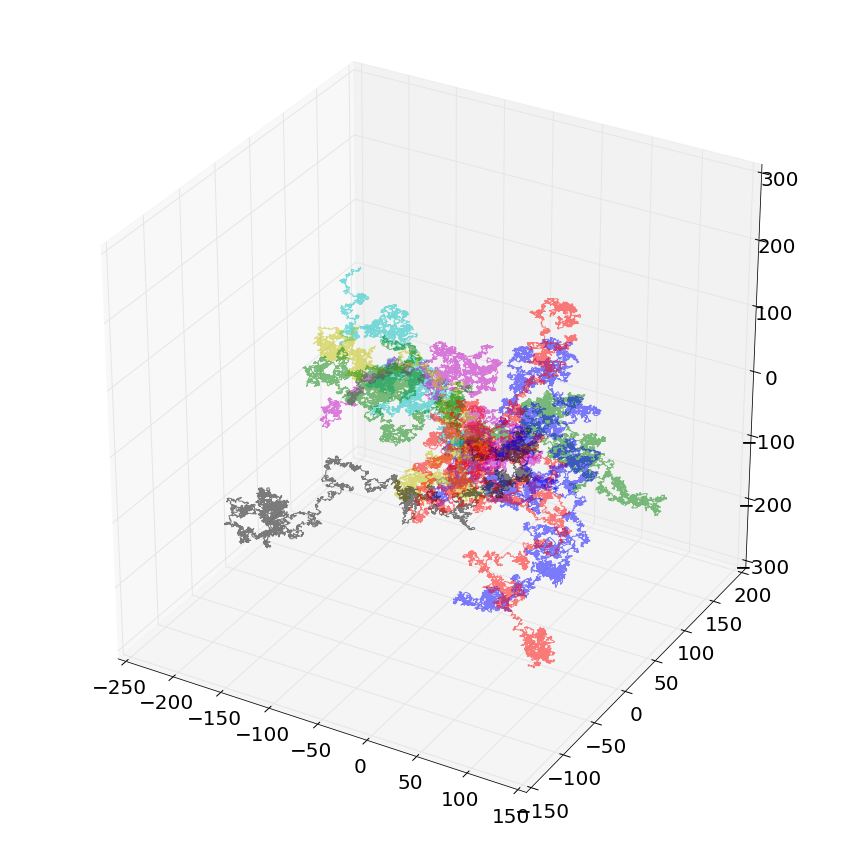

In [2]:
num_walkers = 10
num_steps = 10000
sim = simulation(num_walkers, num_steps)

i think this looks really cool and it is fun to play around with the graphics, but it is a bit more interesting to explore these results with a more quantitative lense. the non-graphical implementation does the exact same thing as the graphical, but can go faster due to not graphing. the main relationship to explore is distance from home (0,0,0) as a function of step count. this value is extremely difficult to come by analytically due to the fact that the walker has an infinite number of options for each step as far as direction and distance. so this is what i want to explore.

100
200
300
400
500
600
700
800
900


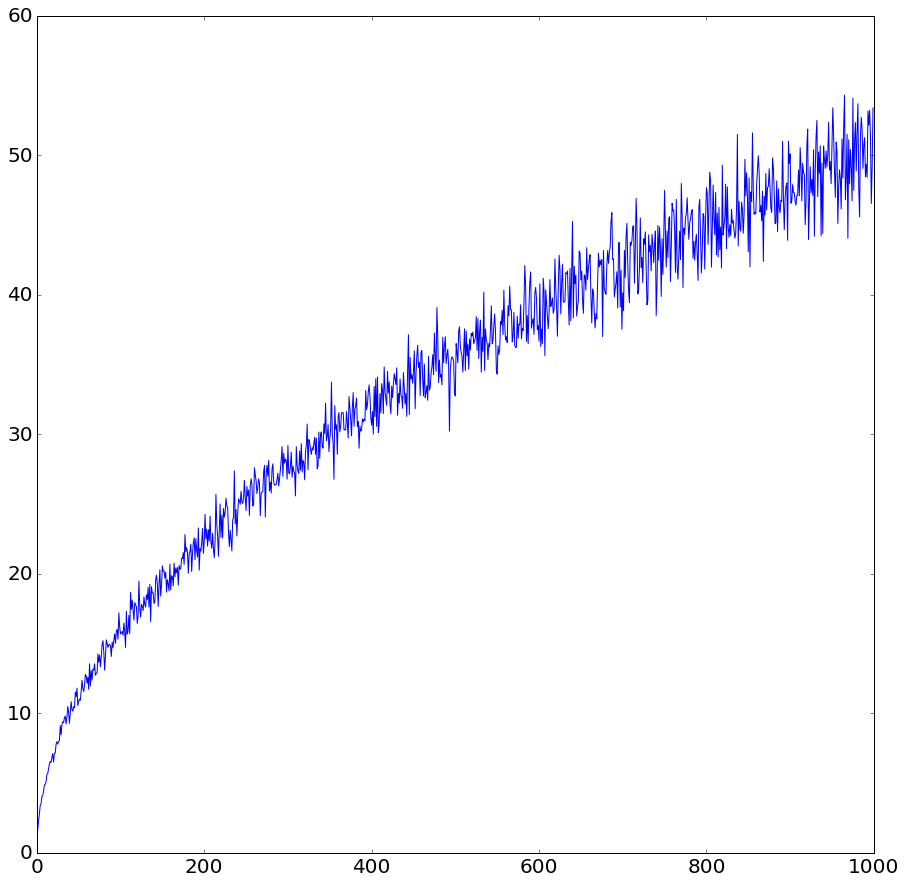

In [9]:
distances = np.arange(1,1000)
num_walkers = 100
mean_distances = []
for distance in distances:
    if distance % 100 == 0:
        print(distance)
    current_sim = simulation_non_graphical(num_walkers, distance)
    mean_distances.append(current_sim.get_distances().mean())
plt.plot(distances, mean_distances)
plt.show()